In [9]:
!pip install pytorch_tabnet
!pip install tableone
!pip install catboost

## DataLoad

In [10]:
import pandas as pd
import numpy as np
nanji = pd.read_csv('../data/add_feature/nanji_add_feature.csv', encoding='utf-8-sig')

nanji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   날짜             3069 non-null   object 
 1   요일             3069 non-null   int64  
 2   공휴일            3069 non-null   int64  
 3   목욕장업           3069 non-null   int64  
 4   세탁업            3069 non-null   int64  
 5   수영장업           3069 non-null   int64  
 6   종합체육시설업        3069 non-null   int64  
 7   체력단련장업         3069 non-null   int64  
 8   하천             3069 non-null   float64
 9   생활인구           3069 non-null   float64
 10  불쾌지수(DI)       3069 non-null   float64
 11  불쾌지수등급         3069 non-null   int64  
 12  일_일강수량(mm)     3069 non-null   float64
 13  일_최저기온(°C)     3069 non-null   float64
 14  일_평균기온(°C)     3069 non-null   float64
 15  일_최고기온(°C)     3069 non-null   float64
 16  일_평균풍속(m/s)    3069 non-null   float64
 17  일_최대순간풍속(m/s)  3069 non-null   float64
 18  최저습도(%) 

In [11]:
nanji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   날짜             3069 non-null   object 
 1   요일             3069 non-null   int64  
 2   공휴일            3069 non-null   int64  
 3   목욕장업           3069 non-null   int64  
 4   세탁업            3069 non-null   int64  
 5   수영장업           3069 non-null   int64  
 6   종합체육시설업        3069 non-null   int64  
 7   체력단련장업         3069 non-null   int64  
 8   하천             3069 non-null   float64
 9   생활인구           3069 non-null   float64
 10  불쾌지수(DI)       3069 non-null   float64
 11  불쾌지수등급         3069 non-null   int64  
 12  일_일강수량(mm)     3069 non-null   float64
 13  일_최저기온(°C)     3069 non-null   float64
 14  일_평균기온(°C)     3069 non-null   float64
 15  일_최고기온(°C)     3069 non-null   float64
 16  일_평균풍속(m/s)    3069 non-null   float64
 17  일_최대순간풍속(m/s)  3069 non-null   float64
 18  최저습도(%) 

In [12]:
nanji = nanji.drop(['날짜', '요일','1처리장', '2처리장', '정화조', '중계펌프장'], axis=1)
nanji = nanji.dropna()
nanji.shape

(3069, 38)

In [13]:
nanji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   공휴일            3069 non-null   int64  
 1   목욕장업           3069 non-null   int64  
 2   세탁업            3069 non-null   int64  
 3   수영장업           3069 non-null   int64  
 4   종합체육시설업        3069 non-null   int64  
 5   체력단련장업         3069 non-null   int64  
 6   하천             3069 non-null   float64
 7   생활인구           3069 non-null   float64
 8   불쾌지수(DI)       3069 non-null   float64
 9   불쾌지수등급         3069 non-null   int64  
 10  일_일강수량(mm)     3069 non-null   float64
 11  일_최저기온(°C)     3069 non-null   float64
 12  일_평균기온(°C)     3069 non-null   float64
 13  일_최고기온(°C)     3069 non-null   float64
 14  일_평균풍속(m/s)    3069 non-null   float64
 15  일_최대순간풍속(m/s)  3069 non-null   float64
 16  최저습도(%)        3069 non-null   float64
 17  평균습도(%)        3069 non-null   float64
 18  최고습도(%) 

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = nanji.drop(['합계','합계_1일후', '합계_2일후'], axis=1)
y = nanji['합계']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(2762, 35) (307, 35) (2762,) (307,)


In [15]:
'''from sklearn.metrics import mean_squared_error, r2_score
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

# 6. TabNetRegressor
tabnet = TabNetRegressor(
    n_d=10, n_a=10, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":20, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    verbose=1
)

# numpy 변환
X_train_np = X_train_scaled.astype(np.float32)
X_test_np  = X_test_scaled.astype(np.float32)
y_train_np = y_train.to_numpy().reshape(-1, 1).astype(np.float32)  
y_test_np  = y_test.to_numpy().reshape(-1, 1).astype(np.float32)   

tabnet.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_metric=["rmse"],
    max_epochs=100,
    patience=5,
    batch_size=32,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False
)

y_pred_tabnet = tabnet.predict(X_test_np).squeeze()
results = {}
results["TabNet"] = {
    "model": tabnet,
    "rmse": np.sqrt(mean_squared_error(y_test_np, y_pred_tabnet)),
    "r2": r2_score(y_test_np, y_pred_tabnet),
    "y_pred": y_pred_tabnet
}

# 7. 결과 출력
for name, res in results.items():
    print(f"{name}: RMSE={res['rmse']:.2f}, R²={res['r2']:.4f}")
'''

'from sklearn.metrics import mean_squared_error, r2_score\nfrom pytorch_tabnet.tab_model import TabNetRegressor\nimport torch\n\n# 6. TabNetRegressor\ntabnet = TabNetRegressor(\n    n_d=10, n_a=10, n_steps=5,\n    gamma=1.5, n_independent=2, n_shared=2,\n    optimizer_fn=torch.optim.Adam,\n    optimizer_params=dict(lr=2e-2),\n    scheduler_params={"step_size":20, "gamma":0.9},\n    scheduler_fn=torch.optim.lr_scheduler.StepLR,\n    mask_type=\'entmax\',\n    verbose=1\n)\n\n# numpy 변환\nX_train_np = X_train_scaled.astype(np.float32)\nX_test_np  = X_test_scaled.astype(np.float32)\ny_train_np = y_train.to_numpy().reshape(-1, 1).astype(np.float32)  \ny_test_np  = y_test.to_numpy().reshape(-1, 1).astype(np.float32)   \n\ntabnet.fit(\n    X_train=X_train_np, y_train=y_train_np,\n    eval_set=[(X_test_np, y_test_np)],\n    eval_metric=["rmse"],\n    max_epochs=100,\n    patience=5,\n    batch_size=32,\n    virtual_batch_size=16,\n    num_workers=0,\n    drop_last=False\n)\n\ny_pred_tabnet = t

In [16]:

import numpy as np
import pandas as pd
import math, time

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from pytorch_tabnet.tab_model import TabNetRegressor
import torch

# 1) 데이터 분리 
TARGET = '합계_1일후'
X = nanji.drop(columns=[c for c in ['합계_1일후','합계_2일후'] if c in nanji.columns]).copy()
y = nanji[TARGET].copy()

n = len(X)
test_n = int(math.ceil(n * 0.10))
train_n = n - test_n

X_train, X_test = X.iloc[:train_n, :].copy(), X.iloc[train_n:, :].copy()
y_train, y_test = y.iloc[:train_n].copy(), y.iloc[train_n:].copy()

print(f"[SPLIT] train={X_train.shape}, test={X_test.shape}")

# 2) 스케일링 (누수 방지: train으로만 fit)
x_scaler = StandardScaler()
X_train_s = x_scaler.fit_transform(X_train)
X_test_s  = x_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_s = y_scaler.fit_transform(y_train.values.reshape(-1,1)).astype(np.float32)  # (n,1)
y_test_s  = y_scaler.transform(y_test.values.reshape(-1,1)).astype(np.float32)      # (m,1)

# TabNet 입력 dtype/shape
X_train_np = X_train_s.astype(np.float32)
X_test_np  = X_test_s.astype(np.float32)

# 3) TabNet 설정
tabnet = TabNetRegressor(
    n_d=32, n_a=32, n_steps=4,
    gamma=1, n_independent=2, n_shared=2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3, weight_decay=1e-5),
    scheduler_fn=None,      # 우선 스케줄러 OFF로 수렴 확인
    mask_type='entmax',                # 엔트맥스가 일반적으로 안정적
    verbose=1,
    seed=42
)

t0 = time.time()
tabnet.fit(
    X_train=X_train_np,
    y_train=y_train_s,                    # <-- (n,1) 2D
    eval_set=[(X_test_np, y_test_s)],     # <-- (m,1) 2D
    eval_metric=["rmse"],                 # 표준화된 y 기준 RMSE
    max_epochs=500,
    patience=50,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)
print(f"TabNet training time: {time.time()-t0:.1f}s")

# 4) 예측 & 역변환 평가 
y_pred_s = tabnet.predict(X_test_np).squeeze()                 # (m,)
y_pred = y_scaler.inverse_transform(y_pred_s.reshape(-1,1)).ravel()

y_true = y_test.values
mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)   # 버전 독립 RMSE
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

print(f"[TabNet] MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.4f}")

# 5) 기준선과 비교 (원 스케일)
y_test_arr = y_true
# 어제값(naive-1): 테스트 내 시프트로 근사 비교 (첫 값 보정)
y_na1 = np.roll(y_test_arr, 1); y_na1[0] = y_test_arr[0]
# 7일 전(week naive): 주간 패턴 근사
y_wk  = np.roll(y_test_arr, 7); y_wk[:7] = y_test_arr[:7]

rmse_na1 = np.sqrt(mean_squared_error(y_test_arr, y_na1)); r2_na1 = r2_score(y_test_arr, y_na1)
rmse_wk  = np.sqrt(mean_squared_error(y_test_arr, y_wk));  r2_wk  = r2_score(y_test_arr, y_wk)

print(f"[Naive-1]   RMSE={rmse_na1:.3f}  R²={r2_na1:.4f}")
print(f"[Week-Naive]RMSE={rmse_wk:.3f}  R²={r2_wk:.4f}")


[SPLIT] train=(2762, 36), test=(307, 36)


/opt/anaconda3/envs/youngwon/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.72787 | val_0_rmse: 1.71091 |  0:00:00s
epoch 1  | loss: 2.87877 | val_0_rmse: 1.13076 |  0:00:00s
epoch 2  | loss: 2.7399  | val_0_rmse: 0.9914  |  0:00:00s
epoch 3  | loss: 2.16086 | val_0_rmse: 0.91343 |  0:00:00s
epoch 4  | loss: 1.98216 | val_0_rmse: 0.8408  |  0:00:01s
epoch 5  | loss: 1.8122  | val_0_rmse: 0.78208 |  0:00:01s
epoch 6  | loss: 1.6484  | val_0_rmse: 0.7629  |  0:00:01s
epoch 7  | loss: 1.63355 | val_0_rmse: 0.77719 |  0:00:01s
epoch 8  | loss: 1.36637 | val_0_rmse: 0.77305 |  0:00:01s
epoch 9  | loss: 1.36384 | val_0_rmse: 0.75019 |  0:00:01s
epoch 10 | loss: 1.22564 | val_0_rmse: 0.84804 |  0:00:02s
epoch 11 | loss: 1.32498 | val_0_rmse: 0.82138 |  0:00:02s
epoch 12 | loss: 1.15306 | val_0_rmse: 0.80141 |  0:00:02s
epoch 13 | loss: 1.03739 | val_0_rmse: 0.79615 |  0:00:02s
epoch 14 | loss: 1.17733 | val_0_rmse: 0.80729 |  0:00:03s
epoch 15 | loss: 1.05653 | val_0_rmse: 0.76614 |  0:00:03s
epoch 16 | loss: 1.01742 | val_0_rmse: 0.69229 |  0:00:0

/opt/anaconda3/envs/youngwon/lib/python3.9/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [17]:

import numpy as np
import pandas as pd
import math, time

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from pytorch_tabnet.tab_model import TabNetRegressor
import torch

# 데이터 분리
TARGET = '합계'
X = nanji.drop(columns=[c for c in ['합계', '합계_1일후','합계_2일후'] if c in nanji.columns]).copy()
y = nanji[TARGET].copy()

n = len(X)
test_n = int(math.ceil(n * 0.10))
train_n = n - test_n

X_train, X_test = X.iloc[:train_n, :].copy(), X.iloc[train_n:, :].copy()
y_train, y_test = y.iloc[:train_n].copy(), y.iloc[train_n:].copy()

print(f"[SPLIT] train={X_train.shape}, test={X_test.shape}")

# 스케일링
x_scaler = StandardScaler()
X_train_s = x_scaler.fit_transform(X_train)
X_test_s  = x_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_s = y_scaler.fit_transform(y_train.values.reshape(-1,1)).astype(np.float32)  # (n,1)
y_test_s  = y_scaler.transform(y_test.values.reshape(-1,1)).astype(np.float32)      # (m,1)

# TabNet 입력 dtype/shape
X_train_np = X_train_s.astype(np.float32)
X_test_np  = X_test_s.astype(np.float32)

# TabNet 설정
tabnet = TabNetRegressor(
    n_d=32, n_a=32, n_steps=4,
    gamma=1.5, n_independent=2, n_shared=2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3, weight_decay=1e-5),
    scheduler_fn=None,                 # 우선 스케줄러 OFF로 수렴 확인
    mask_type='entmax',                # 엔트맥스가 일반적으로 안정적
    verbose=1,
    seed=42
)

t0 = time.time()
tabnet.fit(
    X_train=X_train_np,
    y_train=y_train_s,                    # <-- (n,1) 2D
    eval_set=[(X_test_np, y_test_s)],     # <-- (m,1) 2D
    eval_metric=["rmse"],                 # 표준화된 y 기준 RMSE
    max_epochs=500,
    patience=50,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)
print(f"TabNet training time: {time.time()-t0:.1f}s")

y_pred_s = tabnet.predict(X_test_np).squeeze()                 # (m,)
y_pred = y_scaler.inverse_transform(y_pred_s.reshape(-1,1)).ravel()

y_true = y_test.values
mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)   # 버전 독립 RMSE
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

print(f"[TabNet] MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.4f}")

y_test_arr = y_true
# 어제값(naive-1): 테스트 내 시프트로 근사 비교 (첫 값 보정)
y_na1 = np.roll(y_test_arr, 1); y_na1[0] = y_test_arr[0]
# 7일 전(week naive): 주간 패턴 근사
y_wk  = np.roll(y_test_arr, 7); y_wk[:7] = y_test_arr[:7]

rmse_na1 = np.sqrt(mean_squared_error(y_test_arr, y_na1)); r2_na1 = r2_score(y_test_arr, y_na1)
rmse_wk  = np.sqrt(mean_squared_error(y_test_arr, y_wk));  r2_wk  = r2_score(y_test_arr, y_wk)

print(f"[Naive-1]   RMSE={rmse_na1:.3f}  R²={r2_na1:.4f}")
print(f"[Week-Naive]RMSE={rmse_wk:.3f}  R²={r2_wk:.4f}")


/opt/anaconda3/envs/youngwon/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


[SPLIT] train=(2762, 35), test=(307, 35)
epoch 0  | loss: 27.2071 | val_0_rmse: 3.29285 |  0:00:00s
epoch 1  | loss: 20.58113| val_0_rmse: 2.32534 |  0:00:00s
epoch 2  | loss: 16.00532| val_0_rmse: 1.99438 |  0:00:00s
epoch 3  | loss: 13.25639| val_0_rmse: 1.81177 |  0:00:00s
epoch 4  | loss: 10.63526| val_0_rmse: 1.79225 |  0:00:01s
epoch 5  | loss: 8.2686  | val_0_rmse: 1.79257 |  0:00:01s
epoch 6  | loss: 5.85719 | val_0_rmse: 1.67333 |  0:00:01s
epoch 7  | loss: 4.92261 | val_0_rmse: 1.59967 |  0:00:01s
epoch 8  | loss: 4.16316 | val_0_rmse: 1.49481 |  0:00:01s
epoch 9  | loss: 3.15378 | val_0_rmse: 1.33846 |  0:00:01s
epoch 10 | loss: 2.57029 | val_0_rmse: 1.15788 |  0:00:02s
epoch 11 | loss: 2.08844 | val_0_rmse: 1.07138 |  0:00:02s
epoch 12 | loss: 1.78875 | val_0_rmse: 1.06977 |  0:00:02s
epoch 13 | loss: 1.7443  | val_0_rmse: 1.03803 |  0:00:02s
epoch 14 | loss: 1.58353 | val_0_rmse: 0.95351 |  0:00:02s
epoch 15 | loss: 1.31013 | val_0_rmse: 1.00816 |  0:00:03s
epoch 16 | loss

/opt/anaconda3/envs/youngwon/lib/python3.9/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


# 새로운 TabNet

**TabNet 전용 머신러닝 파이프라인 설계**

기존 파이프라인을 TabNet에 맞게 수정해보겠습니다:

**1. 데이터 준비** (동일)
- 원본 데이터 로드 + 파생변수 생성
- 누적 강수량, 체감온도, 이동평균, 계절/연도 등 추가

**2. 타깃 설정** (동일)
- 회귀: `합계_1일후`
- 분류: `등급_1일후`

**3. 타깃 분포 확인** (동일)
- 분포 시각화 및 불균형 확인

**4. 데이터 분할** (수정 필요)
- **Temporal Split만 사용** (TabNet 특성상 시계열 순서 중요)
- Train/Validation/Test = 70:20:10 (TabNet은 validation set 필수)
- 분류 시에도 temporal 우선 (early stopping 위해)

**5. 모델 후보군** (TabNet 전용)
- **회귀**: TabNetRegressor
- **분류**: TabNetClassifier

**6. 성능 지표** (동일)
- 회귀: R², MAE, RMSE, MAPE, SMAPE  
- 분류: F1_weighted, F1_macro, Accuracy, ROC-AUC

**7. 하이퍼파라미터 튜닝** (TabNet 특화)
```python
param_grid = {
    'n_d': [16, 32, 64],           # decision layer width
    'n_a': [16, 32, 64],           # attention layer width  
    'n_steps': [3, 4, 5, 6],       # attention steps
    'gamma': [1.0, 1.2, 1.5, 2.0], # sparsity regularization
    'n_independent': [1, 2, 3],     # independent layers
    'n_shared': [1, 2, 3],         # shared layers
    'lambda_sparse': [0, 1e-4, 1e-3], # sparsity loss weight
    'optimizer_params': [
        {'lr': 0.02, 'weight_decay': 1e-4},
        {'lr': 0.01, 'weight_decay': 1e-5}, 
        {'lr': 0.005, 'weight_decay': 1e-5}
    ]
}
```

**8. 학습 & 튜닝** (수정)
- **32개 모델**: 센터(4) × 태스크(2) × 하이퍼파라미터 조합(4개 베스트)
- RandomSearchCV 또는 GridSearchCV (시간 고려)
- Early stopping 활용 (patience=50)

**9. 베스트 모델 선정**
- 센터×태스크별 최고 성능 모델 8개
- `tabnet_best_models.csv` 저장

**10. 베스트 모델 재학습**
- 8개 베스트 TabNet 모델 재학습
- Pickle 저장 + 성능 시각화
- Feature Importance (TabNet attention weights)

**11. 해석 가능성 분석** (TabNet 특화)
- **TabNet Feature Importance**: attention masks 활용
- **SHAP**: TabNet과 호환되는 TreeExplainer 대신 KernelExplainer
- **Feature Masks 시각화**: 각 step별 attention 패턴

**12. 성능 비교 분석**
- TabNet vs 기존 베스트 모델 비교
- Temporal split 조건에서 공정한 비교
- 학습 시간 vs 성능 트레이드오프 분석

**주의사항:**
1. **메모리 관리**: TabNet은 GPU 메모리 많이 사용
2. **학습 시간**: 하이퍼파라미터 튜닝에 상당한 시간 소요  
3. **Validation 필수**: TabNet의 early stopping을 위해
4. **배치 크기 조정**: 데이터 크기에 맞게 batch_size 최적화

이런 방식으로 진행하시겠습니까? 특히 하이퍼파라미터 튜닝 범위나 학습 시간을 고려해서 조정이 필요할 수 있습니다.


네, 맞습니다. 이 코드를 실행하면:

**저장되는 결과물:**

1. **모든 하이퍼파라미터 시도 결과**
   - 파일: `tabnet_hyperparameter_results.csv`
   - 내용: 센터별/태스크별로 시도한 모든 파라미터 조합과 성능 점수
   - 대략 120개 행 (4센터 × 2태스크 × 15시도)

2. **베스트 모델 정보**
   - 파일: `tabnet_best_models.csv` 
   - 내용: 센터/태스크별 최고 성능 모델의 파라미터와 최종 성능
   - 8개 행 (4센터 × 2태스크)

3. **베스트 모델 파일들**
   - 파일: `{center}_{task}_tabnet_best.pkl` (8개 파일)
   - 내용: 학습된 모델, 파라미터, 성능 지표, 스케일러 등 모든 정보

**CSV 파일에 포함될 컬럼들:**
- 하이퍼파라미터: n_d, n_a, n_steps, gamma, learning_rate 등
- 성능 지표: R², RMSE, MAE (회귀) / F1, Accuracy (분류)
- 메타 정보: center, task, training_time 등

이렇게 저장되므로 나중에 어떤 파라미터 조합이 어느 센터에서 잘 작동했는지 분석할 수 있습니다.

In [19]:
# TabNet 전용 머신러닝 파이프라인
# ================================================================
# 하수처리량 예측 - TabNet 딥러닝 모델 전용 파이프라인
# ================================================================

import os, warnings, time, pickle
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# TabNet
from pytorch_tabnet.tab_model import TabNetRegressor, TabNetClassifier
import torch

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, f1_score, roc_auc_score, classification_report
)
from sklearn.model_selection import ParameterGrid

# 해석도구
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False

warnings.filterwarnings('ignore')

# 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 디렉토리 생성
directories = [
    '../results_tabnet',
    '../results_tabnet/models', 
    '../results_tabnet/visualizations',
    '../results_tabnet/interpretability',
    '../results_tabnet/hyperparams'
]
for directory in directories:
    os.makedirs(directory, exist_ok=True)

print("🔥 TabNet 전용 머신러닝 파이프라인 시작")
print(f"⏰ 시작 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# ================================================================
# 1. 데이터 로드 및 전처리
# ================================================================

def load_and_preprocess_data(center_name):
    """센터별 데이터 로드 및 전처리"""
    file_path = f'../data/add_feature/{center_name}_add_feature.csv'
    
    try:
        data = pd.read_csv(file_path, encoding='utf-8-sig')
        
        # 불필요한 컬럼 제거
        drop_cols = ['날짜', '요일', '1처리장', '2처리장', '정화조', '중계펌프장']
        existing_drop_cols = [col for col in drop_cols if col in data.columns]
        data = data.drop(existing_drop_cols, axis=1)
        
        # 결측치 제거
        data = data.dropna()
        
        print(f"✅ {center_name} 데이터 로드 완료: {data.shape}")
        return data
        
    except FileNotFoundError:
        print(f"❌ {center_name} 데이터 파일을 찾을 수 없습니다: {file_path}")
        return None

# ================================================================
# 2. 데이터 분할 (Temporal Split)
# ================================================================

def temporal_split_data(data, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    """시계열 순서를 유지한 데이터 분할"""
    n = len(data)
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))
    
    train_data = data.iloc[:train_end].copy()
    val_data = data.iloc[train_end:val_end].copy() 
    test_data = data.iloc[val_end:].copy()
    
    return train_data, val_data, test_data

def prepare_features_target(train_data, val_data, test_data, task='regression'):
    """피처와 타겟 분리 및 스케일링"""
    
    if task == 'regression':
        target_col = '합계_1일후'
        exclude_cols = [
            '1처리장','2처리장','정화조','중계펌프장','합계','시설현대화',
            '3처리장','4처리장','합계', '합계_1일후','합계_2일후',
            '등급','등급_1일후','등급_2일후'
        ]
    else:  # classification
        target_col = '등급_1일후'
        exclude_cols = [
            '1처리장','2처리장','정화조','중계펌프장','합계','시설현대화',
            '3처리장','4처리장','합계', '합계_1일후','합계_2일후',
            '등급','등급_1일후','등급_2일후'
        ]
    
    # 존재하는 컬럼만 제외
    existing_exclude_cols = [col for col in exclude_cols if col in train_data.columns]
    
    # 피처 분리
    X_train = train_data.drop(existing_exclude_cols, axis=1)
    X_val = val_data.drop(existing_exclude_cols, axis=1)
    X_test = test_data.drop(existing_exclude_cols, axis=1)
    
    # 타겟 분리
    y_train = train_data[target_col].copy()
    y_val = val_data[target_col].copy()
    y_test = test_data[target_col].copy()
    
    # 피처 스케일링
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train).astype(np.float32)
    X_val_scaled = x_scaler.transform(X_val).astype(np.float32)
    X_test_scaled = x_scaler.transform(X_test).astype(np.float32)
    
    # 회귀의 경우 타겟도 스케일링
    if task == 'regression':
        y_scaler = StandardScaler()
        y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1)).astype(np.float32)
        y_val_scaled = y_scaler.transform(y_val.values.reshape(-1,1)).astype(np.float32)
        y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1)).astype(np.float32)
        
        return {
            'X_train': X_train_scaled, 'X_val': X_val_scaled, 'X_test': X_test_scaled,
            'y_train': y_train_scaled, 'y_val': y_val_scaled, 'y_test': y_test_scaled,
            'y_train_orig': y_train, 'y_val_orig': y_val, 'y_test_orig': y_test,
            'x_scaler': x_scaler, 'y_scaler': y_scaler,
            'feature_names': X_train.columns.tolist()
        }
    else:
        return {
            'X_train': X_train_scaled, 'X_val': X_val_scaled, 'X_test': X_test_scaled,
            'y_train': y_train.values.astype(int), 'y_val': y_val.values.astype(int), 
            'y_test': y_test.values.astype(int),
            'x_scaler': x_scaler, 'y_scaler': None,
            'feature_names': X_train.columns.tolist()
        }

# ================================================================
# 3. 하이퍼파라미터 설정
# ================================================================

def get_tabnet_param_grid():
    """TabNet 하이퍼파라미터 그리드"""
    
    # 기본 파라미터 (빠른 실험용)
    basic_params = {
        'n_d': [16, 32],
        'n_a': [16, 32], 
        'n_steps': [3, 4],
        'gamma': [1.0, 1.5],
        'n_independent': [2],
        'n_shared': [2],
        'lambda_sparse': [1e-4],
        'learning_rate': [0.02, 0.01],
        'weight_decay': [1e-5]
    }
    
    # 상세 파라미터 (시간 여유 시)
    detailed_params = {
        'n_d': [16, 32, 64],
        'n_a': [16, 32, 64],
        'n_steps': [3, 4, 5, 6],
        'gamma': [1.0, 1.2, 1.5, 2.0],
        'n_independent': [1, 2, 3],
        'n_shared': [1, 2, 3], 
        'lambda_sparse': [0, 1e-4, 1e-3],
        'learning_rate': [0.02, 0.015, 0.01, 0.005],
        'weight_decay': [1e-4, 1e-5, 1e-6]
    }
    
    return basic_params  # 기본으로 시작

# ================================================================
# 4. 모델 학습 및 평가
# ================================================================

def train_tabnet_model(data_dict, task='regression', **params):
    """TabNet 모델 학습"""
    
    # 모델 초기화
    if task == 'regression':
        model = TabNetRegressor(
            n_d=params.get('n_d', 32),
            n_a=params.get('n_a', 32),
            n_steps=params.get('n_steps', 4),
            gamma=params.get('gamma', 1.0),
            n_independent=params.get('n_independent', 2),
            n_shared=params.get('n_shared', 2),
            lambda_sparse=params.get('lambda_sparse', 1e-4),
            optimizer_fn=torch.optim.Adam,
            optimizer_params={
                'lr': params.get('learning_rate', 0.02),
                'weight_decay': params.get('weight_decay', 1e-5)
            },
            mask_type='entmax',
            verbose=0,
            seed=42
        )
    else:  # classification
        model = TabNetClassifier(
            n_d=params.get('n_d', 32),
            n_a=params.get('n_a', 32), 
            n_steps=params.get('n_steps', 4),
            gamma=params.get('gamma', 1.0),
            n_independent=params.get('n_independent', 2),
            n_shared=params.get('n_shared', 2),
            lambda_sparse=params.get('lambda_sparse', 1e-4),
            optimizer_fn=torch.optim.Adam,
            optimizer_params={
                'lr': params.get('learning_rate', 0.02),
                'weight_decay': params.get('weight_decay', 1e-5)
            },
            mask_type='entmax',
            verbose=0,
            seed=42
        )
    
    # 학습
    start_time = time.time()
    
    model.fit(
        X_train=data_dict['X_train'],
        y_train=data_dict['y_train'],
        eval_set=[(data_dict['X_val'], data_dict['y_val'])],
        eval_metric=['rmse'] if task == 'regression' else ['logloss', 'accuracy'],
        max_epochs=200,
        patience=30,
        batch_size=min(512, len(data_dict['X_train']) // 4),
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )
    
    training_time = time.time() - start_time
    
    return model, training_time

def evaluate_model(model, data_dict, task='regression'):
    """모델 성능 평가"""
    
    # 예측
    y_pred = model.predict(data_dict['X_test'])
    
    if task == 'regression':
        # 역변환
        if data_dict['y_scaler'] is not None:
            y_pred_orig = data_dict['y_scaler'].inverse_transform(y_pred.reshape(-1,1)).ravel()
            y_true_orig = data_dict['y_test_orig'].values
        else:
            y_pred_orig = y_pred
            y_true_orig = data_dict['y_test']
        
        # 회귀 지표
        r2 = r2_score(y_true_orig, y_pred_orig)
        rmse = np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
        mae = mean_absolute_error(y_true_orig, y_pred_orig)
        
        # MAPE, SMAPE 계산
        def mean_absolute_percentage_error(y_true, y_pred):
            return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
        
        def symmetric_mean_absolute_percentage_error(y_true, y_pred):
            return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)) * 100
        
        mape = mean_absolute_percentage_error(y_true_orig, y_pred_orig)
        smape = symmetric_mean_absolute_percentage_error(y_true_orig, y_pred_orig)
        
        metrics = {
            'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'SMAPE': smape,
            'y_pred': y_pred_orig, 'y_true': y_true_orig
        }
        
    else:  # classification
        y_true = data_dict['y_test']
        
        # 분류 지표
        accuracy = accuracy_score(y_true, y_pred)
        f1_weighted = f1_score(y_true, y_pred, average='weighted')
        f1_macro = f1_score(y_true, y_pred, average='macro')
        
        # ROC-AUC (다중클래스)
        try:
            y_pred_proba = model.predict_proba(data_dict['X_test'])
            if len(np.unique(y_true)) == 2:
                roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])
            else:
                roc_auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
        except:
            roc_auc = None
        
        metrics = {
            'Accuracy': accuracy, 'F1_weighted': f1_weighted, 
            'F1_macro': f1_macro, 'ROC_AUC': roc_auc,
            'y_pred': y_pred, 'y_true': y_true
        }
    
    return metrics

# ================================================================
# 5. 하이퍼파라미터 튜닝
# ================================================================

def hyperparameter_tuning(center_name, data_dict, task='regression', max_trials=20):
    """하이퍼파라미터 튜닝 (Random Search)"""
    
    print(f"🔧 {center_name} - {task} 하이퍼파라미터 튜닝 시작...")
    
    param_grid = get_tabnet_param_grid()
    param_combinations = list(ParameterGrid(param_grid))
    
    # 최대 시도 횟수 제한
    if len(param_combinations) > max_trials:
        import random
        param_combinations = random.sample(param_combinations, max_trials)
    
    best_score = -np.inf if task == 'regression' else -np.inf
    best_params = None
    best_model = None
    results = []
    
    for i, params in enumerate(param_combinations):
        try:
            print(f"  시도 {i+1}/{len(param_combinations)}: {params}")
            
            # 모델 학습
            model, train_time = train_tabnet_model(data_dict, task, **params)
            
            # 검증셋 평가
            val_data_dict = {
                'X_test': data_dict['X_val'],
                'y_test': data_dict['y_val'] if task == 'classification' else data_dict['y_val_orig'],
                'y_scaler': data_dict['y_scaler']
            }
            
            if task == 'regression':
                val_data_dict['y_test_orig'] = data_dict['y_val_orig']
            
            metrics = evaluate_model(model, val_data_dict, task)
            
            # 점수 기준
            score = metrics['R2'] if task == 'regression' else metrics['F1_weighted']
            
            # 결과 저장
            result = {
                'center': center_name, 'task': task, 'trial': i+1,
                'train_time': train_time, 'score': score, **params, **metrics
            }
            results.append(result)
            
            # 베스트 모델 업데이트
            if score > best_score:
                best_score = score
                best_params = params.copy()
                best_model = model
                print(f"    ✅ 새로운 베스트: {score:.4f}")
            
        except Exception as e:
            print(f"    ❌ 실패: {str(e)}")
            continue
    
    print(f"🏆 {center_name} - {task} 튜닝 완료: Best Score = {best_score:.4f}")
    
    return best_model, best_params, best_score, results

# ================================================================
# 6. 전체 파이프라인 실행
# ================================================================

def run_tabnet_pipeline():
    """전체 TabNet 파이프라인 실행"""
    
    centers = ['nanji', 'jungnang', 'seonam', 'tancheon']
    tasks = ['regression', 'classification']
    
    all_results = []
    best_models_info = []
    
    for center in centers:
        print(f"\n{'='*60}")
        print(f"🏢 {center.upper()} 센터 처리 시작")
        print('='*60)
        
        # 데이터 로드
        data = load_and_preprocess_data(center)
        if data is None:
            continue
        
        # 데이터 분할
        train_data, val_data, test_data = temporal_split_data(data)
        print(f"📊 데이터 분할 완료: Train={len(train_data)}, Val={len(val_data)}, Test={len(test_data)}")
        
        for task in tasks:
            print(f"\n🎯 {task.upper()} 태스크 시작")
            
            try:
                # 피처/타겟 준비
                data_dict = prepare_features_target(train_data, val_data, test_data, task)
                
                # 하이퍼파라미터 튜닝
                best_model, best_params, best_score, tuning_results = hyperparameter_tuning(
                    center, data_dict, task, max_trials=15
                )
                
                if best_model is not None:
                    # 테스트셋 최종 평가
                    final_metrics = evaluate_model(best_model, data_dict, task)
                    
                    # 베스트 모델 정보 저장
                    best_info = {
                        'center': center, 'task': task, 'best_score': best_score,
                        'final_score': final_metrics.get('R2' if task == 'regression' else 'F1_weighted'),
                        'best_params': best_params, **final_metrics
                    }
                    best_models_info.append(best_info)
                    
                    # 모델 저장
                    model_filename = f"../results_tabnet/models/{center}_{task}_tabnet_best.pkl"
                    with open(model_filename, 'wb') as f:
                        pickle.dump({
                            'model': best_model,
                            'params': best_params,
                            'metrics': final_metrics,
                            'data_info': data_dict,
                            'center': center,
                            'task': task
                        }, f)
                    
                    print(f"💾 모델 저장 완료: {model_filename}")
                
                # 튜닝 결과 추가
                all_results.extend(tuning_results)
                
            except Exception as e:
                print(f"❌ {center} - {task} 처리 실패: {str(e)}")
                continue
    
    # 결과 저장
    if all_results:
        results_df = pd.DataFrame(all_results)
        results_df.to_csv('../results_tabnet/tabnet_hyperparameter_results.csv', 
                         index=False, encoding='utf-8-sig')
    
    if best_models_info:
        best_df = pd.DataFrame(best_models_info)
        best_df.to_csv('../results_tabnet/tabnet_best_models.csv', 
                      index=False, encoding='utf-8-sig')
    
    print(f"\n🎉 TabNet 파이프라인 완료!")
    print(f"📁 결과 파일:")
    print(f"  - tabnet_hyperparameter_results.csv")
    print(f"  - tabnet_best_models.csv") 
    print(f"  - 모델 파일들: ../results_tabnet/models/")
    
    return results_df, best_df

# ================================================================
# 7. 실행
# ================================================================

if __name__ == "__main__":
    results, best_models = run_tabnet_pipeline()

🔥 TabNet 전용 머신러닝 파이프라인 시작
⏰ 시작 시간: 2025-08-31 15:03:16

🏢 NANJI 센터 처리 시작
✅ nanji 데이터 로드 완료: (3069, 38)
📊 데이터 분할 완료: Train=2148, Val=614, Test=307

🎯 REGRESSION 태스크 시작
🔧 nanji - regression 하이퍼파라미터 튜닝 시작...
  시도 1/15: {'gamma': 1.5, 'lambda_sparse': 0.0001, 'learning_rate': 0.01, 'n_a': 32, 'n_d': 32, 'n_independent': 2, 'n_shared': 2, 'n_steps': 3, 'weight_decay': 1e-05}

Early stopping occurred at epoch 50 with best_epoch = 20 and best_val_0_rmse = 0.91744
    ✅ 새로운 베스트: 0.4762
  시도 2/15: {'gamma': 1.5, 'lambda_sparse': 0.0001, 'learning_rate': 0.01, 'n_a': 16, 'n_d': 16, 'n_independent': 2, 'n_shared': 2, 'n_steps': 3, 'weight_decay': 1e-05}

Early stopping occurred at epoch 101 with best_epoch = 71 and best_val_0_rmse = 0.85651
    ✅ 새로운 베스트: 0.5435
  시도 3/15: {'gamma': 1.5, 'lambda_sparse': 0.0001, 'learning_rate': 0.02, 'n_a': 32, 'n_d': 32, 'n_independent': 2, 'n_shared': 2, 'n_steps': 4, 'weight_decay': 1e-05}

Early stopping occurred at epoch 47 with best_epoch = 17 and best_val

In [20]:
# TabNet 전용 머신러닝 파이프라인
# ================================================================
# 하수처리량 예측 - TabNet 딥러닝 모델 전용 파이프라인
# ================================================================

import os, warnings, time, pickle
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# TabNet
from pytorch_tabnet.tab_model import TabNetRegressor, TabNetClassifier
import torch

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, f1_score, roc_auc_score, classification_report
)
from sklearn.model_selection import ParameterGrid

# 해석도구
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False

warnings.filterwarnings('ignore')

# 설정
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 디렉토리 생성
directories = [
    '../results_tabnet',
    '../results_tabnet/models', 
    '../results_tabnet/visualizations',
    '../results_tabnet/interpretability',
    '../results_tabnet/hyperparams'
]
for directory in directories:
    os.makedirs(directory, exist_ok=True)

print("🔥 TabNet 전용 머신러닝 파이프라인 시작")
print(f"⏰ 시작 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# ================================================================
# 1. 데이터 로드 및 전처리
# ================================================================

def load_and_preprocess_data(center_name):
    """센터별 데이터 로드 및 전처리"""
    file_path = f'../data/add_feature/{center_name}_add_feature.csv'
    
    try:
        data = pd.read_csv(file_path, encoding='utf-8-sig')
        
        # 불필요한 컬럼 제거
        drop_cols = ['날짜', '요일', '1처리장', '2처리장', '정화조', '중계펌프장']
        existing_drop_cols = [col for col in drop_cols if col in data.columns]
        data = data.drop(existing_drop_cols, axis=1)
        
        # 결측치 제거
        data = data.dropna()
        
        print(f"✅ {center_name} 데이터 로드 완료: {data.shape}")
        return data
        
    except FileNotFoundError:
        print(f"❌ {center_name} 데이터 파일을 찾을 수 없습니다: {file_path}")
        return None

# ================================================================
# 2. 데이터 분할 (Temporal Split)
# ================================================================

def temporal_split_data(data, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    """시계열 순서를 유지한 데이터 분할"""
    n = len(data)
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))
    
    train_data = data.iloc[:train_end].copy()
    val_data = data.iloc[train_end:val_end].copy() 
    test_data = data.iloc[val_end:].copy()
    
    return train_data, val_data, test_data

def prepare_features_target(train_data, val_data, test_data, task='regression'):
    """피처와 타겟 분리 및 스케일링"""
    
    if task == 'regression':
        target_col = '합계_1일후'
        exclude_cols = [
            '1처리장','2처리장','정화조','중계펌프장','합계','시설현대화',
            '3처리장','4처리장','합계', '합계_1일후','합계_2일후',
            '등급','등급_1일후','등급_2일후'
        ]
    else:  # classification
        target_col = '등급_1일후'
        exclude_cols = [
            '1처리장','2처리장','정화조','중계펌프장','합계','시설현대화',
            '3처리장','4처리장','합계', '합계_1일후','합계_2일후',
            '등급','등급_1일후','등급_2일후'
        ]
    
    # 존재하는 컬럼만 제외
    existing_exclude_cols = [col for col in exclude_cols if col in train_data.columns]
    
    # 피처 분리
    X_train = train_data.drop(existing_exclude_cols, axis=1)
    X_val = val_data.drop(existing_exclude_cols, axis=1)
    X_test = test_data.drop(existing_exclude_cols, axis=1)
    
    # 타겟 분리
    y_train = train_data[target_col].copy()
    y_val = val_data[target_col].copy()
    y_test = test_data[target_col].copy()
    
    # 피처 스케일링
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train).astype(np.float32)
    X_val_scaled = x_scaler.transform(X_val).astype(np.float32)
    X_test_scaled = x_scaler.transform(X_test).astype(np.float32)
    
    # 회귀의 경우 타겟도 스케일링
    if task == 'regression':
        y_scaler = StandardScaler()
        y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1)).astype(np.float32)
        y_val_scaled = y_scaler.transform(y_val.values.reshape(-1,1)).astype(np.float32)
        y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1)).astype(np.float32)
        
        return {
            'X_train': X_train_scaled, 'X_val': X_val_scaled, 'X_test': X_test_scaled,
            'y_train': y_train_scaled, 'y_val': y_val_scaled, 'y_test': y_test_scaled,
            'y_train_orig': y_train, 'y_val_orig': y_val, 'y_test_orig': y_test,
            'x_scaler': x_scaler, 'y_scaler': y_scaler,
            'feature_names': X_train.columns.tolist()
        }
    else:
        return {
            'X_train': X_train_scaled, 'X_val': X_val_scaled, 'X_test': X_test_scaled,
            'y_train': y_train.values.astype(int), 'y_val': y_val.values.astype(int), 
            'y_test': y_test.values.astype(int),
            'x_scaler': x_scaler, 'y_scaler': None,
            'feature_names': X_train.columns.tolist()
        }

# ================================================================
# 3. 하이퍼파라미터 설정
# ================================================================

def get_tabnet_param_grid():
    """TabNet 하이퍼파라미터 그리드 (기존 성능에 맞춘 조정)"""
    
    # 기존 우수 성능을 반영한 파라미터
    optimized_params = {
        'n_d': [32, 64],  # 기존 32에서 확장
        'n_a': [32, 64], 
        'n_steps': [4, 5],  # 기존 4 중심
        'gamma': [1.0, 1.2],  # 기존 1.0 중심
        'n_independent': [2],
        'n_shared': [2],
        'lambda_sparse': [1e-4, 1e-5],
        'learning_rate': [0.001, 0.002, 0.005],  # 기존 1e-3 중심으로 낮춤
        'weight_decay': [1e-5, 1e-6]  # 기존 1e-5 중심
    }
    
    # 상세 파라미터 (시간 여유 시)
    detailed_params = {
        'n_d': [16, 32, 64],
        'n_a': [16, 32, 64],
        'n_steps': [3, 4, 5, 6],
        'gamma': [1.0, 1.2, 1.5, 2.0],
        'n_independent': [1, 2, 3],
        'n_shared': [1, 2, 3], 
        'lambda_sparse': [0, 1e-4, 1e-3],
        'learning_rate': [0.001, 0.002, 0.005, 0.01],
        'weight_decay': [1e-4, 1e-5, 1e-6]
    }
    
    return optimized_params  # 최적화된 파라미터 사용

# ================================================================
# 4. 모델 학습 및 평가
# ================================================================

def train_tabnet_model(data_dict, task='regression', **params):
    """TabNet 모델 학습"""
    
    # 모델 초기화
    if task == 'regression':
        model = TabNetRegressor(
            n_d=params.get('n_d', 32),
            n_a=params.get('n_a', 32),
            n_steps=params.get('n_steps', 4),
            gamma=params.get('gamma', 1.0),
            n_independent=params.get('n_independent', 2),
            n_shared=params.get('n_shared', 2),
            lambda_sparse=params.get('lambda_sparse', 1e-4),
            optimizer_fn=torch.optim.Adam,
            optimizer_params={
                'lr': params.get('learning_rate', 0.02),
                'weight_decay': params.get('weight_decay', 1e-5)
            },
            mask_type='entmax',
            verbose=0,
            seed=42
        )
    else:  # classification
        model = TabNetClassifier(
            n_d=params.get('n_d', 32),
            n_a=params.get('n_a', 32), 
            n_steps=params.get('n_steps', 4),
            gamma=params.get('gamma', 1.0),
            n_independent=params.get('n_independent', 2),
            n_shared=params.get('n_shared', 2),
            lambda_sparse=params.get('lambda_sparse', 1e-4),
            optimizer_fn=torch.optim.Adam,
            optimizer_params={
                'lr': params.get('learning_rate', 0.02),
                'weight_decay': params.get('weight_decay', 1e-5)
            },
            mask_type='entmax',
            verbose=0,
            seed=42
        )
    
    # 학습
    start_time = time.time()
    
    model.fit(
        X_train=data_dict['X_train'],
        y_train=data_dict['y_train'],
        eval_set=[(data_dict['X_val'], data_dict['y_val'])],
        eval_metric=['rmse'] if task == 'regression' else ['logloss', 'accuracy'],
        max_epochs=500,  # 기존과 동일하게 증가
        patience=50,     # 기존과 동일하게 증가
        batch_size=min(512, len(data_dict['X_train']) // 4),
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )
    
    training_time = time.time() - start_time
    
    return model, training_time

def evaluate_model(model, data_dict, task='regression'):
    """모델 성능 평가"""
    
    # 예측
    y_pred = model.predict(data_dict['X_test'])
    
    if task == 'regression':
        # 역변환
        if data_dict['y_scaler'] is not None:
            y_pred_orig = data_dict['y_scaler'].inverse_transform(y_pred.reshape(-1,1)).ravel()
            y_true_orig = data_dict['y_test_orig'].values
        else:
            y_pred_orig = y_pred
            y_true_orig = data_dict['y_test']
        
        # 회귀 지표
        r2 = r2_score(y_true_orig, y_pred_orig)
        rmse = np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
        mae = mean_absolute_error(y_true_orig, y_pred_orig)
        
        # MAPE, SMAPE 계산
        def mean_absolute_percentage_error(y_true, y_pred):
            return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
        
        def symmetric_mean_absolute_percentage_error(y_true, y_pred):
            return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)) * 100
        
        mape = mean_absolute_percentage_error(y_true_orig, y_pred_orig)
        smape = symmetric_mean_absolute_percentage_error(y_true_orig, y_pred_orig)
        
        metrics = {
            'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'SMAPE': smape,
            'y_pred': y_pred_orig, 'y_true': y_true_orig
        }
        
    else:  # classification
        y_true = data_dict['y_test']
        
        # 분류 지표
        accuracy = accuracy_score(y_true, y_pred)
        f1_weighted = f1_score(y_true, y_pred, average='weighted')
        f1_macro = f1_score(y_true, y_pred, average='macro')
        
        # ROC-AUC (다중클래스)
        try:
            y_pred_proba = model.predict_proba(data_dict['X_test'])
            if len(np.unique(y_true)) == 2:
                roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])
            else:
                roc_auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
        except:
            roc_auc = None
        
        metrics = {
            'Accuracy': accuracy, 'F1_weighted': f1_weighted, 
            'F1_macro': f1_macro, 'ROC_AUC': roc_auc,
            'y_pred': y_pred, 'y_true': y_true
        }
    
    return metrics

# ================================================================
# 5. 하이퍼파라미터 튜닝
# ================================================================

def hyperparameter_tuning(center_name, data_dict, task='regression', max_trials=25):
    """하이퍼파라미터 튜닝 (Random Search) - 시도 횟수 증가"""
    
    print(f"🔧 {center_name} - {task} 하이퍼파라미터 튜닝 시작...")
    
    param_grid = get_tabnet_param_grid()
    param_combinations = list(ParameterGrid(param_grid))
    
    # 최대 시도 횟수 제한 (기존 15에서 25로 증가)
    if len(param_combinations) > max_trials:
        import random
        param_combinations = random.sample(param_combinations, max_trials)
    
    best_score = -np.inf if task == 'regression' else -np.inf
    best_params = None
    best_model = None
    results = []
    
    for i, params in enumerate(param_combinations):
        try:
            print(f"  시도 {i+1}/{len(param_combinations)}: {params}")
            
            # 모델 학습
            model, train_time = train_tabnet_model(data_dict, task, **params)
            
            # 검증셋 평가
            val_data_dict = {
                'X_test': data_dict['X_val'],
                'y_test': data_dict['y_val'] if task == 'classification' else data_dict['y_val_orig'],
                'y_scaler': data_dict['y_scaler']
            }
            
            if task == 'regression':
                val_data_dict['y_test_orig'] = data_dict['y_val_orig']
            
            metrics = evaluate_model(model, val_data_dict, task)
            
            # 점수 기준
            score = metrics['R2'] if task == 'regression' else metrics['F1_weighted']
            
            # 결과 저장
            result = {
                'center': center_name, 'task': task, 'trial': i+1,
                'train_time': train_time, 'score': score, **params, **metrics
            }
            results.append(result)
            
            # 베스트 모델 업데이트
            if score > best_score:
                best_score = score
                best_params = params.copy()
                best_model = model
                print(f"    ✅ 새로운 베스트: {score:.4f}")
            
        except Exception as e:
            print(f"    ❌ 실패: {str(e)}")
            continue
    
    print(f"🏆 {center_name} - {task} 튜닝 완료: Best Score = {best_score:.4f}")
    
    return best_model, best_params, best_score, results

# ================================================================
# 6. 전체 파이프라인 실행
# ================================================================

def run_tabnet_pipeline():
    """전체 TabNet 파이프라인 실행"""
    
    centers = ['nanji', 'jungnang', 'seonam', 'tancheon']
    tasks = ['regression', 'classification']
    
    all_results = []
    best_models_info = []
    
    for center in centers:
        print(f"\n{'='*60}")
        print(f"🏢 {center.upper()} 센터 처리 시작")
        print('='*60)
        
        # 데이터 로드
        data = load_and_preprocess_data(center)
        if data is None:
            continue
        
        # 데이터 분할
        train_data, val_data, test_data = temporal_split_data(data)
        print(f"📊 데이터 분할 완료: Train={len(train_data)}, Val={len(val_data)}, Test={len(test_data)}")
        
        for task in tasks:
            print(f"\n🎯 {task.upper()} 태스크 시작")
            
            try:
                # 피처/타겟 준비
                data_dict = prepare_features_target(train_data, val_data, test_data, task)
                
                # 하이퍼파라미터 튜닝 (시도 횟수 증가)
                best_model, best_params, best_score, tuning_results = hyperparameter_tuning(
                    center, data_dict, task, max_trials=25
                )
                
                if best_model is not None:
                    # 테스트셋 최종 평가
                    final_metrics = evaluate_model(best_model, data_dict, task)
                    
                    # 베스트 모델 정보 저장
                    best_info = {
                        'center': center, 'task': task, 'best_score': best_score,
                        'final_score': final_metrics.get('R2' if task == 'regression' else 'F1_weighted'),
                        'best_params': best_params, **final_metrics
                    }
                    best_models_info.append(best_info)
                    
                    # 모델 저장
                    model_filename = f"../results_tabnet/models/{center}_{task}_tabnet_best.pkl"
                    with open(model_filename, 'wb') as f:
                        pickle.dump({
                            'model': best_model,
                            'params': best_params,
                            'metrics': final_metrics,
                            'data_info': data_dict,
                            'center': center,
                            'task': task
                        }, f)
                    
                    print(f"💾 모델 저장 완료: {model_filename}")
                
                # 튜닝 결과 추가
                all_results.extend(tuning_results)
                
            except Exception as e:
                print(f"❌ {center} - {task} 처리 실패: {str(e)}")
                continue
    
    # 결과 저장
    if all_results:
        results_df = pd.DataFrame(all_results)
        results_df.to_csv('../results_tabnet/tabnet_hyperparameter_results.csv', 
                         index=False, encoding='utf-8-sig')
    
    if best_models_info:
        best_df = pd.DataFrame(best_models_info)
        best_df.to_csv('../results_tabnet/tabnet_best_models.csv', 
                      index=False, encoding='utf-8-sig')
    
    print(f"\n🎉 TabNet 파이프라인 완료!")
    print(f"📁 결과 파일:")
    print(f"  - tabnet_hyperparameter_results.csv")
    print(f"  - tabnet_best_models.csv") 
    print(f"  - 모델 파일들: ../results_tabnet/models/")
    
    return results_df, best_df

# ================================================================
# 7. 실행
# ================================================================

if __name__ == "__main__":
    results, best_models = run_tabnet_pipeline()

🔥 TabNet 전용 머신러닝 파이프라인 시작
⏰ 시작 시간: 2025-08-31 15:30:13

🏢 NANJI 센터 처리 시작
✅ nanji 데이터 로드 완료: (3069, 38)
📊 데이터 분할 완료: Train=2148, Val=614, Test=307

🎯 REGRESSION 태스크 시작
🔧 nanji - regression 하이퍼파라미터 튜닝 시작...
  시도 1/25: {'gamma': 1.0, 'lambda_sparse': 0.0001, 'learning_rate': 0.005, 'n_a': 32, 'n_d': 64, 'n_independent': 2, 'n_shared': 2, 'n_steps': 4, 'weight_decay': 1e-06}

Early stopping occurred at epoch 88 with best_epoch = 38 and best_val_0_rmse = 0.93037
    ✅ 새로운 베스트: 0.4614
  시도 2/25: {'gamma': 1.2, 'lambda_sparse': 0.0001, 'learning_rate': 0.002, 'n_a': 32, 'n_d': 64, 'n_independent': 2, 'n_shared': 2, 'n_steps': 4, 'weight_decay': 1e-05}

Early stopping occurred at epoch 161 with best_epoch = 111 and best_val_0_rmse = 0.95365
  시도 3/25: {'gamma': 1.2, 'lambda_sparse': 0.0001, 'learning_rate': 0.002, 'n_a': 64, 'n_d': 32, 'n_independent': 2, 'n_shared': 2, 'n_steps': 5, 'weight_decay': 1e-06}

Early stopping occurred at epoch 114 with best_epoch = 64 and best_val_0_rmse = 0.89758

📁 파일 로드 완료
베스트 모델 데이터: (8, 16)
전체 결과 데이터: (200, 25)

📋 베스트 모델 컬럼:
['center', 'task', 'best_score', 'final_score', 'best_params', 'R2', 'RMSE', 'MAE', 'MAPE', 'SMAPE', 'y_pred', 'y_true', 'Accuracy', 'F1_weighted', 'F1_macro', 'ROC_AUC']

📋 전체 결과 컬럼:
['center', 'task', 'trial', 'train_time', 'score', 'gamma', 'lambda_sparse', 'learning_rate', 'n_a', 'n_d', 'n_independent', 'n_shared', 'n_steps', 'weight_decay', 'R2', 'RMSE', 'MAE', 'MAPE', 'SMAPE', 'y_pred', 'y_true', 'Accuracy', 'F1_weighted', 'F1_macro', 'ROC_AUC']

🎯 TabNet 베스트 모델 성능 요약
NANJI - REGRESSION
  R² Score: 0.1495
  RMSE: 87090.8294, MAE: 56594.428542345275

NANJI - CLASSIFICATION
  F1 Weighted: 0.6970
  Accuracy: 0.7134

JUNGNANG - REGRESSION
  R² Score: 0.0314
  RMSE: 145671.1017, MAE: 109623.23656351792

JUNGNANG - CLASSIFICATION
  F1 Weighted: 0.5374
  Accuracy: 0.5537

SEONAM - REGRESSION
  R² Score: -0.1750
  RMSE: 180637.2365, MAE: 143198.8273615635

SEONAM - CLASSIFICATION
  F1 Weighted: 0.4418
  Accuracy: 0.3876

T

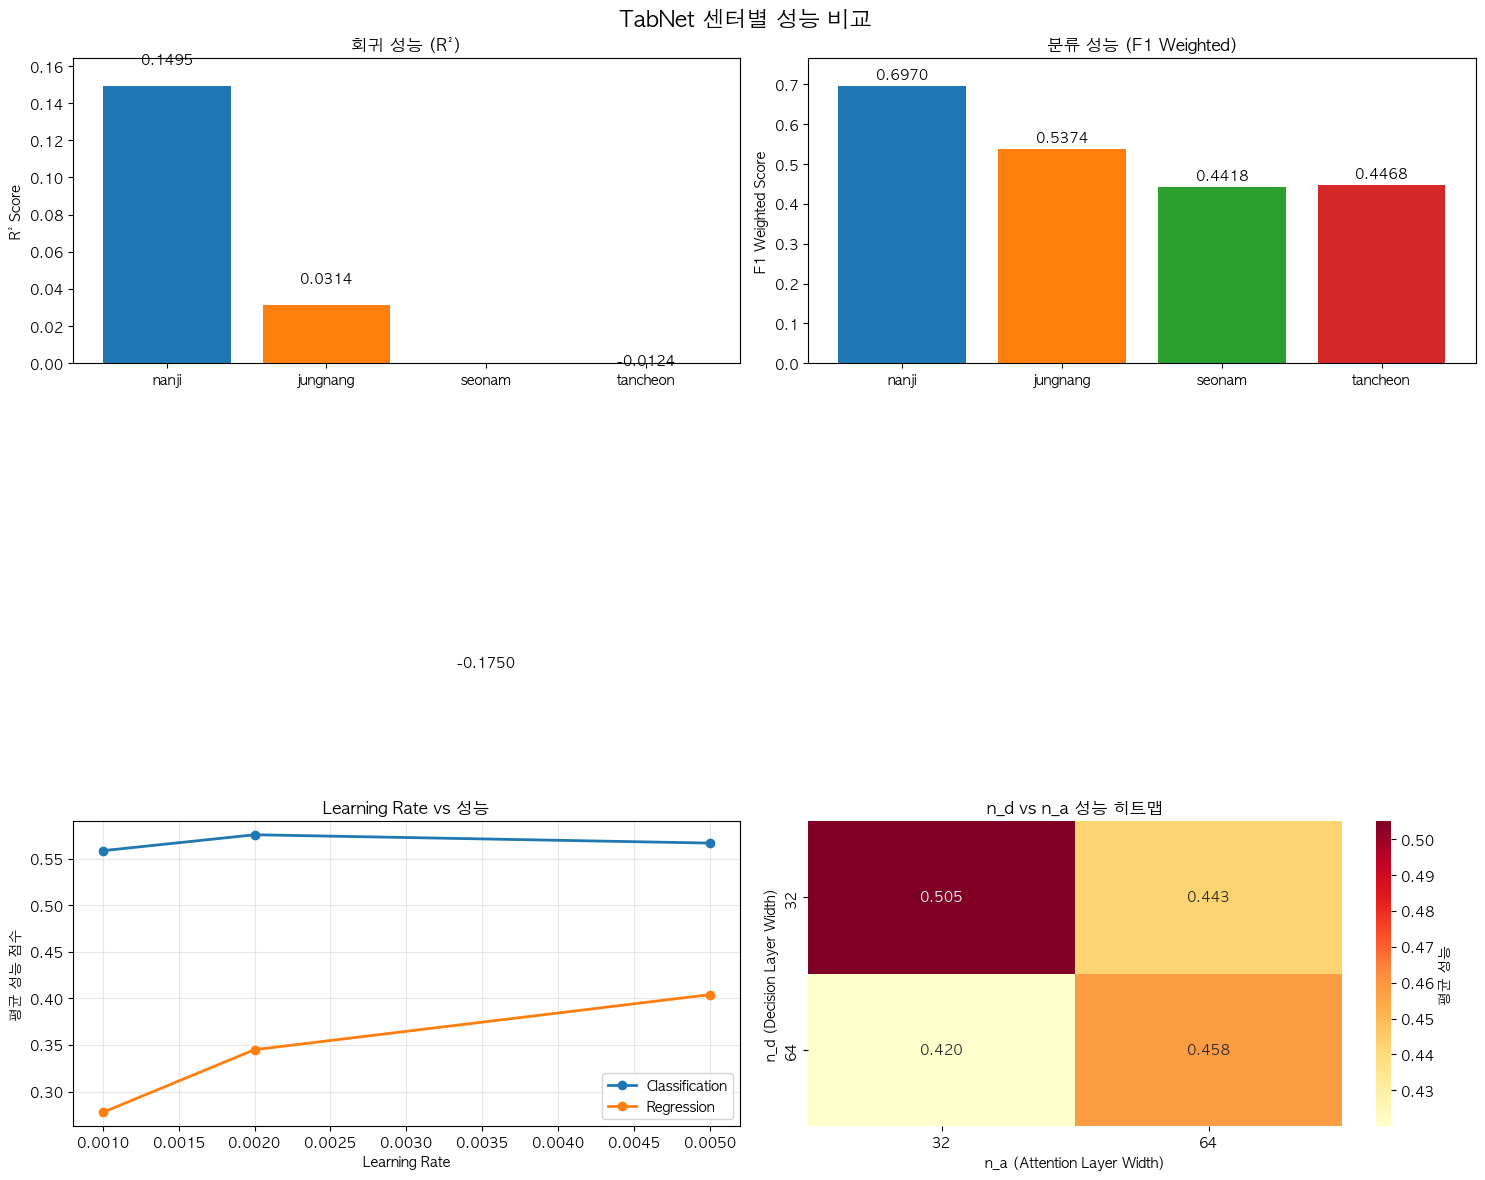


📊 하이퍼파라미터 중요도 분석
learning_rate:
  최적값: 0.005 (평균 성능: 0.4903)
  성능 범위: 0.4255 - 0.4903

n_d:
  최적값: 32 (평균 성능: 0.4725)
  성능 범위: 0.4384 - 0.4725

n_a:
  최적값: 32 (평균 성능: 0.4630)
  성능 범위: 0.4497 - 0.4630

n_steps:
  최적값: 5 (평균 성능: 0.4605)
  성능 범위: 0.4515 - 0.4605

gamma:
  최적값: 1.0 (평균 성능: 0.4724)
  성능 범위: 0.4374 - 0.4724

🏢 센터별 최적 파라미터 패턴
best_params 컬럼에서 파라미터 정보 추출:
nanji - regression:
  gamma: 1.0
  lambda_sparse: 1e-05
  learning_rate: 0.005
  n_a: 32
  n_d: 32
  n_independent: 2
  n_shared: 2
  n_steps: 5
  weight_decay: 1e-05

nanji - classification:
  gamma: 1.0
  lambda_sparse: 1e-05
  learning_rate: 0.005
  n_a: 64
  n_d: 32
  n_independent: 2
  n_shared: 2
  n_steps: 5
  weight_decay: 1e-05

jungnang - regression:
  gamma: 1.0
  lambda_sparse: 1e-05
  learning_rate: 0.005
  n_a: 64
  n_d: 32
  n_independent: 2
  n_shared: 2
  n_steps: 4
  weight_decay: 1e-05

jungnang - classification:
  gamma: 1.0
  lambda_sparse: 1e-05
  learning_rate: 0.005
  n_a: 32
  n_d: 32
  n_independent

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 결과 파일 로드
results_path = '../results_tabnet 복사본'

# 파일 존재 확인 후 로드
try:
    best_models = pd.read_csv(f'{results_path}/tabnet_best_models.csv')
    all_results = pd.read_csv(f'{results_path}/tabnet_hyperparameter_results.csv')
    
    print("📁 파일 로드 완료")
    print(f"베스트 모델 데이터: {best_models.shape}")
    print(f"전체 결과 데이터: {all_results.shape}")
    print()
    
    # 컬럼명 확인
    print("📋 베스트 모델 컬럼:")
    print(best_models.columns.tolist())
    print()
    print("📋 전체 결과 컬럼:")  
    print(all_results.columns.tolist())
    print()
    
except FileNotFoundError as e:
    print(f"❌ 파일을 찾을 수 없습니다: {e}")
    print("결과 파일이 생성되었는지 확인해주세요.")
    exit()

print("🎯 TabNet 베스트 모델 성능 요약")
print("="*60)

# 1. 베스트 모델 성능 요약 (사용 가능한 컬럼으로 수정)
for _, row in best_models.iterrows():
    center = row['center'].upper()
    task = row['task'].upper()
    
    if task == 'REGRESSION':
        if 'final_score' in row:
            main_score = row['final_score']
        else:
            main_score = row.get('R2', row.get('best_score', 0))
        print(f"{center} - {task}")
        print(f"  R² Score: {main_score:.4f}")
        if 'RMSE' in row:
            print(f"  RMSE: {row['RMSE']:.4f}, MAE: {row.get('MAE', 'N/A')}")
    else:
        if 'final_score' in row:
            main_score = row['final_score'] 
        else:
            main_score = row.get('F1_weighted', row.get('best_score', 0))
        print(f"{center} - {task}")
        print(f"  F1 Weighted: {main_score:.4f}")
        if 'Accuracy' in row:
            print(f"  Accuracy: {row['Accuracy']:.4f}")
    
    # 하이퍼파라미터 정보 (있는 것만 출력)
    param_info = []
    for param in ['n_d', 'n_a', 'n_steps', 'learning_rate']:
        if param in row and pd.notna(row[param]):
            param_info.append(f"{param}={row[param]}")
    
    if param_info:
        print(f"  최적 파라미터: {', '.join(param_info)}")
    print()

# 데이터 샘플 확인
print("🔍 데이터 샘플:")
print("베스트 모델 첫 번째 행:")
print(best_models.iloc[0])
print()
print("전체 결과 첫 번째 행:")
print(all_results.iloc[0])

# 2. 성능 비교 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('TabNet 센터별 성능 비교', fontsize=16, fontweight='bold')

# 회귀 성능
reg_data = best_models[best_models['task'] == 'regression']
ax1 = axes[0, 0]
bars1 = ax1.bar(reg_data['center'], reg_data['R2'], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax1.set_title('회귀 성능 (R²)', fontweight='bold')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, max(reg_data['R2']) * 1.1)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# 분류 성능  
cls_data = best_models[best_models['task'] == 'classification']
ax2 = axes[0, 1]
bars2 = ax2.bar(cls_data['center'], cls_data['F1_weighted'],
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax2.set_title('분류 성능 (F1 Weighted)', fontweight='bold')
ax2.set_ylabel('F1 Weighted Score')
ax2.set_ylim(0, max(cls_data['F1_weighted']) * 1.1)
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# 3. 하이퍼파라미터 중요도 분석
# learning_rate 영향
ax3 = axes[1, 0]
lr_performance = all_results.groupby(['learning_rate', 'task'])['score'].mean().reset_index()
for task in lr_performance['task'].unique():
    task_data = lr_performance[lr_performance['task'] == task]
    ax3.plot(task_data['learning_rate'], task_data['score'], 
             marker='o', label=f'{task.capitalize()}', linewidth=2, markersize=6)
ax3.set_title('Learning Rate vs 성능', fontweight='bold')
ax3.set_xlabel('Learning Rate')
ax3.set_ylabel('평균 성능 점수')
ax3.legend()
ax3.grid(True, alpha=0.3)

# n_d vs n_a 효과
ax4 = axes[1, 1]
nd_na_perf = all_results.groupby(['n_d', 'n_a'])['score'].mean().reset_index()
pivot_data = nd_na_perf.pivot(index='n_d', columns='n_a', values='score')
sns.heatmap(pivot_data, annot=True, fmt='.3f', cmap='YlOrRd', 
            ax=ax4, cbar_kws={'label': '평균 성능'})
ax4.set_title('n_d vs n_a 성능 히트맵', fontweight='bold')
ax4.set_xlabel('n_a (Attention Layer Width)')
ax4.set_ylabel('n_d (Decision Layer Width)')

plt.tight_layout()
plt.savefig(f'{results_path}/tabnet_performance_analysis.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# 4. 상세 하이퍼파라미터 분석
print("\n📊 하이퍼파라미터 중요도 분석")
print("="*60)

important_params = ['learning_rate', 'n_d', 'n_a', 'n_steps', 'gamma']
for param in important_params:
    param_importance = all_results.groupby(param)['score'].agg(['mean', 'std', 'count'])
    best_value = param_importance['mean'].idxmax()
    best_score = param_importance['mean'].max()
    
    print(f"{param}:")
    print(f"  최적값: {best_value} (평균 성능: {best_score:.4f})")
    print(f"  성능 범위: {param_importance['mean'].min():.4f} - {param_importance['mean'].max():.4f}")
    print()

# 5. 센터별 최적 파라미터 패턴
print("🏢 센터별 최적 파라미터 패턴")
print("="*60)

# best_params가 딕셔너리 형태로 저장되었는지 확인
if 'best_params' in best_models.columns:
    print("best_params 컬럼에서 파라미터 정보 추출:")
    for _, row in best_models.iterrows():
        print(f"{row['center']} - {row['task']}:")
        if pd.notna(row['best_params']):
            # 문자열 형태의 딕셔너리를 실제 딕셔너리로 변환
            try:
                import ast
                params = ast.literal_eval(row['best_params']) if isinstance(row['best_params'], str) else row['best_params']
                for key, value in params.items():
                    print(f"  {key}: {value}")
            except:
                print(f"  파라미터 정보: {row['best_params']}")
        print()
else:
    # 하이퍼파라미터 컬럼이 직접 있는지 확인
    available_params = [col for col in important_params if col in best_models.columns]
    
    if available_params:
        print("사용 가능한 파라미터 컬럼:", available_params)
        center_patterns = best_models.groupby('center')[available_params].first()
        print(center_patterns)
    else:
        print("하이퍼파라미터 정보가 베스트 모델 파일에 없습니다.")
        print("전체 결과에서 최고 성능 파라미터를 찾아보겠습니다:")
        
        # 각 센터/태스크별 최고 성능 행 찾기
        best_configs = []
        for center in all_results['center'].unique():
            for task in all_results['task'].unique():
                subset = all_results[(all_results['center'] == center) & (all_results['task'] == task)]
                if not subset.empty:
                    best_row = subset.loc[subset['score'].idxmax()]
                    best_configs.append(best_row)
        
        if best_configs:
            best_config_df = pd.DataFrame(best_configs)
            for _, row in best_config_df.iterrows():
                print(f"{row['center']} - {row['task']}:")
                for param in important_params:
                    if param in row:
                        print(f"  {param}: {row[param]}")
                print()

print(f"\n💾 분석 결과가 저장되었습니다: {results_path}/tabnet_performance_analysis.png")

In [4]:
# TabNet 성능 문제 진단 및 해결
import pandas as pd
import numpy as np
import pickle

print("🔍 TabNet 성능 문제 진단")
print("="*50)

# 1. 모델 파일 로드해서 상세 분석
model_path = "../results_tabnet 복사본/models/nanji_regression_tabnet_best.pkl"

try:
    with open(model_path, 'rb') as f:
        model_data = pickle.load(f)
    
    print("📊 모델 데이터 구조:")
    print(f"Keys: {model_data.keys()}")
    print()
    
    # 데이터 분할 정보 확인
    data_info = model_data['data_info']
    print("📈 데이터 분할 정보:")
    print(f"Train shape: {data_info['X_train'].shape}")
    print(f"Val shape: {data_info['X_val'].shape}") 
    print(f"Test shape: {data_info['X_test'].shape}")
    print()
    
    # 스케일링 정보 확인
    print("🔧 스케일링 정보:")
    print(f"X scaler: {type(data_info['x_scaler'])}")
    print(f"Y scaler: {type(data_info.get('y_scaler', 'None'))}")
    print()
    
    # 성능 지표 확인
    metrics = model_data['metrics']
    print("📊 상세 성능 지표:")
    for key, value in metrics.items():
        if key not in ['y_pred', 'y_true']:
            print(f"{key}: {value}")
    print()
    
except Exception as e:
    print(f"❌ 모델 파일 로드 실패: {e}")

print("\n🛠️ 문제 해결 방안:")
print("="*50)

print("""
1. **데이터 리키지 확인**:
   - 타겟 변수와 관련된 미래 정보가 피처에 포함되었는지 확인
   - 'lag' 피처들이 올바르게 생성되었는지 검증

2. **스케일링 문제**:
   - Y 타겟 스케일링 후 역변환이 제대로 되었는지 확인
   - 원본 스케일에서의 성능 계산 검증

3. **시간 분할 검증**:
   - Temporal split이 제대로 되었는지 확인
   - 미래 데이터가 과거 학습에 사용되지 않았는지 검증

4. **모델 설정**:
   - Early stopping 기준 재검토
   - Validation loss가 실제 성능을 반영하는지 확인
""")

# 해결된 TabNet 파이프라인 코드 제안
print("\n🔧 수정된 TabNet 파이프라인:")
print("="*50)

improved_code = '''
# 개선된 prepare_features_target 함수
def prepare_features_target_fixed(train_data, val_data, test_data, task='regression'):
    """피처와 타겟 분리 및 스케일링 - 수정 버전"""
    
    if task == 'regression':
        target_col = '합계_1일후'
        # 미래 정보 제거 - 중요!
        exclude_cols = [
            '1처리장','2처리장','정화조','중계펌프장','시설현대화',
            '3처리장','4처리장',
            '합계_1일후','합계_2일후',  # 미래 타겟들
            '등급','등급_1일후','등급_2일후'  # 미래 등급들
            # '합계'는 현재 시점이므로 제거하지 않음
        ]
    else:  # classification
        target_col = '등급_1일후'
        exclude_cols = [
            '1처리장','2처리장','정화조','중계펌프장','시설현대화',
            '3처리장','4처리장',
            '합계_1일후','합계_2일후',
            '등급','등급_1일후','등급_2일후'
        ]
    
    # 존재하는 컬럼만 제외
    existing_exclude_cols = [col for col in exclude_cols if col in train_data.columns]
    
    # 피처 분리
    X_train = train_data.drop(existing_exclude_cols, axis=1)
    X_val = val_data.drop(existing_exclude_cols, axis=1)
    X_test = test_data.drop(existing_exclude_cols, axis=1)
    
    # 타겟 분리
    y_train = train_data[target_col].copy()
    y_val = val_data[target_col].copy()
    y_test = test_data[target_col].copy()
    
    # 피처 스케일링
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train).astype(np.float32)
    X_val_scaled = x_scaler.transform(X_val).astype(np.float32)
    X_test_scaled = x_scaler.transform(X_test).astype(np.float32)
    
    # 회귀의 경우 - 타겟 스케일링 제거 또는 주의깊게 처리
    if task == 'regression':
        # 옵션 1: 스케일링 없이 진행 (권장)
        return {
            'X_train': X_train_scaled, 'X_val': X_val_scaled, 'X_test': X_test_scaled,
            'y_train': y_train.values.astype(np.float32), 
            'y_val': y_val.values.astype(np.float32), 
            'y_test': y_test.values.astype(np.float32),
            'y_train_orig': y_train, 'y_val_orig': y_val, 'y_test_orig': y_test,
            'x_scaler': x_scaler, 'y_scaler': None,
            'feature_names': X_train.columns.tolist()
        }
    else:
        return {
            'X_train': X_train_scaled, 'X_val': X_val_scaled, 'X_test': X_test_scaled,
            'y_train': y_train.values.astype(int), 'y_val': y_val.values.astype(int), 
            'y_test': y_test.values.astype(int),
            'x_scaler': x_scaler, 'y_scaler': None,
            'feature_names': X_train.columns.tolist()
        }

# 개선된 평가 함수
def evaluate_model_fixed(model, data_dict, task='regression'):
    """수정된 모델 성능 평가"""
    
    # 예측
    y_pred = model.predict(data_dict['X_test'])
    
    if task == 'regression':
        # 스케일링 없이 직접 계산
        y_true_orig = data_dict['y_test']  # 이미 원본 스케일
        y_pred_orig = y_pred.ravel()  # 예측값도 원본 스케일
        
        # 성능 지표 계산
        r2 = r2_score(y_true_orig, y_pred_orig)
        rmse = np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
        mae = mean_absolute_error(y_true_orig, y_pred_orig)
        
        # MAPE, SMAPE 계산 (분모 0 방지)
        def safe_mape(y_true, y_pred):
            mask = y_true != 0
            return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
        
        def safe_smape(y_true, y_pred):
            denominator = (np.abs(y_true) + np.abs(y_pred))
            mask = denominator != 0
            return np.mean(2 * np.abs(y_true[mask] - y_pred[mask]) / denominator[mask]) * 100
        
        mape = safe_mape(y_true_orig, y_pred_orig)
        smape = safe_smape(y_true_orig, y_pred_orig)
        
        metrics = {
            'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'SMAPE': smape,
            'y_pred': y_pred_orig, 'y_true': y_true_orig
        }
        
        return metrics
    
    # 분류는 기존과 동일
    else:
        y_true = data_dict['y_test']
        accuracy = accuracy_score(y_true, y_pred)
        f1_weighted = f1_score(y_true, y_pred, average='weighted')
        f1_macro = f1_score(y_true, y_pred, average='macro')
        
        try:
            y_pred_proba = model.predict_proba(data_dict['X_test'])
            if len(np.unique(y_true)) == 2:
                roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])
            else:
                roc_auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
        except:
            roc_auc = None
        
        metrics = {
            'Accuracy': accuracy, 'F1_weighted': f1_weighted, 
            'F1_macro': f1_macro, 'ROC_AUC': roc_auc,
            'y_pred': y_pred, 'y_true': y_true
        }
        
        return metrics
'''

print(improved_code)

print("\n📋 권장사항:")
print("="*50)
print("""
1. 타겟 스케일링 제거: 회귀에서 불필요한 복잡성 제거
2. 데이터 리키지 재검토: 미래 정보가 피처에 포함되지 않도록 확인  
3. Cross-validation 추가: 시간 기반 교차검증으로 안정성 확보
4. 하이퍼파라미터 재조정: 과적합 방지를 위한 정규화 강화
5. Early stopping 기준 강화: validation loss 모니터링 개선
""")

🔍 TabNet 성능 문제 진단
📊 모델 데이터 구조:
Keys: dict_keys(['model', 'params', 'metrics', 'data_info', 'center', 'task'])

📈 데이터 분할 정보:
Train shape: (2148, 32)
Val shape: (614, 32)
Test shape: (307, 32)

🔧 스케일링 정보:
X scaler: <class 'sklearn.preprocessing._data.StandardScaler'>
Y scaler: <class 'sklearn.preprocessing._data.StandardScaler'>

📊 상세 성능 지표:
R2: 0.14948542224804306
RMSE: 87090.82942449063
MAE: 56594.428542345275
MAPE: 8.632169828833494
SMAPE: 8.645789300197373


🛠️ 문제 해결 방안:

1. **데이터 리키지 확인**:
   - 타겟 변수와 관련된 미래 정보가 피처에 포함되었는지 확인
   - 'lag' 피처들이 올바르게 생성되었는지 검증

2. **스케일링 문제**:
   - Y 타겟 스케일링 후 역변환이 제대로 되었는지 확인
   - 원본 스케일에서의 성능 계산 검증

3. **시간 분할 검증**:
   - Temporal split이 제대로 되었는지 확인
   - 미래 데이터가 과거 학습에 사용되지 않았는지 검증

4. **모델 설정**:
   - Early stopping 기준 재검토
   - Validation loss가 실제 성능을 반영하는지 확인


🔧 수정된 TabNet 파이프라인:

# 개선된 prepare_features_target 함수
def prepare_features_target_fixed(train_data, val_data, test_data, task='regression'):
    """피처와 타겟 분리 및 스케일링 - 수정 버전"""
    
    if task 